# Experimento em sala - Determinação da aceleração da gravidade 

### Alunos: Arthur Cadore Matuella Barcella e Faber Bernardo Júnior. 

- **Objetivo:** Determinar a aceleração da gravidade utilizando um pêndulo simples.

- **Cenário:**
  - Pêndulo simples (fio e peso)
  - Cronômetro
  - Régua 

- **Procedimento:** 
    1. Medir o comprimento do fio do ponto de suspensão até o centro de massa do peso.
    2. Desloque o peso para um pequeno ângulo e solte-o, iniciando a contagem do tempo com o cronômetro.
    3. Meça o tempo que leva para completar várias oscilações (por exemplo, 5 oscilações) e registre esse tempo.
    5. Calcule o período médio dividindo o tempo total pelo número de oscilações.   


In [123]:
# Bibliotecas: 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math

### Calculando Comprimento e Variação do comprimento (Delta L)

In [124]:
# Variaveis do cenário de medição:
l1 = 62  # Comprimento da corda (cm)
l2 = 2.3 # comprimento gancho (cm)
D = 2.85 # Diâmetro do peso (cm)

# Calculo de L (Comprimento do fio + comprimento do gancho + diâmetro do peso / 2 )

L_cm = l1 + l2 + D / 2

# Convertendo para metros
L = L_cm / 100 

# Calculo de deltaL seguindo menor valor de escala /2
DeltaL = 0.0005
print(f"DeltaL: {DeltaL:.4f} m")

# Calculo do L total
L = DeltaL + L 
print(f"Comprimento L: {L:.8f} m")

DeltaL: 0.0005 m
Comprimento L: 0.65775000 m


### Amostrando os valores de tempo (5 Oscilações)

In [125]:
periodos = [8.13, 8.14, 8.17, 8.22, 7.98]

In [126]:
# Cálculo do período médio
periodo_medio = np.array(list(periodos))
periodo_medio = np.mean(periodo_medio) 
print(f"Período médio: {periodo_medio:.4f} s")

Período médio: 8.1280 s


In [127]:
# Cria um vetor de deltaTs diminuindo o periodo médio de cada valor do vetor periodos
deltaTs = np.array(list(periodos)) - periodo_medio
print(f"Delta Ts: {deltaTs}")

Delta Ts: [ 0.002  0.012  0.042  0.092 -0.148]


In [128]:
# Monta um DataFrame com os dados
periodos_1 = [p / 5 for p in periodos]

df = pd.DataFrame({
    '(5 Oscilações)': periodos,
    '(1 Oscilação)': periodos_1,
    '(Delta Ts)': deltaTs
})

# Configurar exibição sem notação científica e com precisão definida
pd.set_option('display.float_format', '{:.4f}'.format)

df

,(5 Oscilações),(1 Oscilação),(Delta Ts)
0,8.1300,1.6260,0.0020
1,8.1400,1.6280,0.0120
2,8.1700,1.6340,0.0420
3,8.2200,1.6440,0.0920
4,7.9800,1.5960,-0.1480


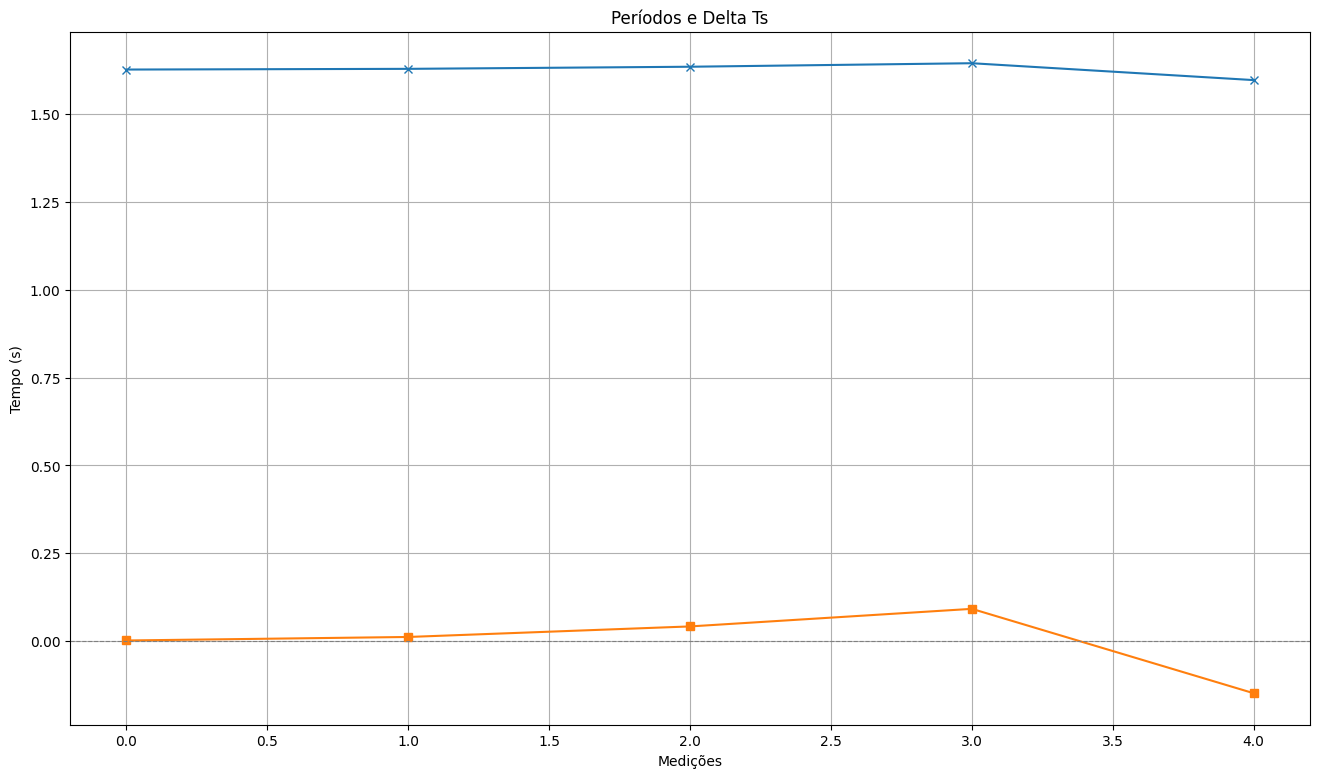

In [129]:
# plota os periodos e o deltaTs

plt.figure(figsize=(16, 9))
plt.plot(periodos_1, label='Períodos (1 Oscilação)', marker='x')
plt.plot(deltaTs, label='Delta Ts', marker='s')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Períodos e Delta Ts')
plt.xlabel('Medições')
plt.ylabel('Tempo (s)')
plt.grid()

In [130]:
# Calcula o desvio padrão dos deltaTs
print("\nDesvio Padrão dos Delta Ts:")
display(Math(r"\sigma = \frac{\sqrt{\sum \Delta T_s^2}}{n - 1}"))

sigma = np.sqrt(np.sum(deltaTs ** 2)) / (len(deltaTs) - 1)
print(f"sigma: {sigma:.4f} s")


Desvio Padrão dos Delta Ts:


<IPython.core.display.Math object>

sigma: 0.0449 s


In [131]:
# Calcula o deltaTm (erro médio)
print("\nCálculo do Delta Tm:")
display(Math(r"\Delta T_m = \frac{\sigma}{\sqrt{n}}"))
DeltaTm = sigma / np.sqrt(len(deltaTs))
print(f"Delta Tm: {DeltaTm:.8f} s")


Cálculo do Delta Tm:


<IPython.core.display.Math object>

Delta Tm: 0.02008731 s


In [132]:
T = (periodo_medio + DeltaTm) / 5 
print(f"Período médio: {T:.4f} s")


Período médio: 1.6296 s


In [133]:
# Calculando G
print("\nCálculo da aceleração da gravidade:")
display(Math(r"g = \frac{L}{\left(\frac{T}{2\pi}\right)^2}"))
g1 = L / ((T / (2 * np.pi)) ** 2 ) 
print(f"Aceleração da gravidade: {g1:.4f} m/s²")


Cálculo da aceleração da gravidade:


<IPython.core.display.Math object>

Aceleração da gravidade: 9.7780 m/s²


In [134]:
# Calculo do delta G
display(Math(r"E_{\Delta T} = 2 \cdot T^{2-1} \cdot \Delta T"))
errDeltaT =  (2* T ** (2-1)) * DeltaTm
print(f"Erro Delta T: {errDeltaT:.8f} segundos")

display(Math(r"E_{\Delta_L} = \frac{L \cdot \Delta T + T \cdot \Delta L}{T^2}"))
errDeltaL = ((L * errDeltaT ) + (T * DeltaL)) / T**2
print(f"Erro Delta L: {errDeltaL:.8f} metros")

display(Math(r"E_{\Delta G} = (2\cdot pi) \cdot E_{\Delta L}"))
errDeltaG = (2*np.pi) * errDeltaL
print(f"Erro Delta G: {errDeltaG:.8f} m/s²")


<IPython.core.display.Math object>

Erro Delta T: 0.06546926 segundos


<IPython.core.display.Math object>

Erro Delta L: 0.01652219 metros


<IPython.core.display.Math object>

Erro Delta G: 0.10381201 m/s²


In [135]:
display(Math(r"g_2 = g_1 + E_{\Delta G}"))
g2 = g1 + errDeltaG
print(f"Aceleração da gravidade com erro: {g2:.2f} m/s²")

<IPython.core.display.Math object>

Aceleração da gravidade com erro: 9.88 m/s²
